In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from IPython.display import display_html

# Command to tell Python to actually display the graphs
%matplotlib inline

# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn import svm

from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold, cross_val_score

from scipy import stats

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the DataSet and exporting that in the DataFrame
safety_df_bow = pd.read_csv("D:\\MS Data Science\\Project 10\\ps_bow.csv")
safety_df_bow.name = "BOW"
safety_df_bigram = pd.read_csv("D:\\MS Data Science\\Project 10\\ps_bigram.csv")
safety_df_bigram.name = "BIGRAM"
safety_df_trigram = pd.read_csv("D:\\MS Data Science\\Project 10\\ps_trigram.csv")
safety_df_trigram.name = "TRIGRAM"
safety_df_tfidf = pd.read_csv("D:\\MS Data Science\\Project 10\\nlp_chatbot_TF_IDF.csv")
safety_df_tfidf.name = "TFIDF"

In [3]:
# Function to display the dataset shape

def display_df(df_name):
    # Displaying the shape of the dataframe
    print("Shape of dataframe", df_name.name)
    print(df_name.shape)

In [4]:
# Function to upsample the target variable

def upsample_df(df_name):
    # Getting the unique value counts from the target column
    print("Displaying the unique values of target column for dataframe", df_name.name)
    print(df_name['Accident Level'].value_counts())
    # Splitting the data
    X = df_name.drop(columns='Accident Level')
    y = df_name['Accident Level']
    smote = SMOTE()
    # Upsampling the data
    X_smote, y_smote = smote.fit_resample(X,y)
    
    # Displaying the shape of the dataframe after upsampling
    print("The shape for data frame X")
    print(X_smote.shape)
    print("The shape for data frame y")
    print(y_smote.shape)
    print('Unique Values for the target variable after sampling:')
    print(y_smote.value_counts())
    
    # Splitting the training data and test data in 80:20 ratio
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 10)
    
    # Displaying the shape of dataframe after split
    print("The shape for data frame X_train")
    print(X_train.shape)
    print("The shape for data frame X_test")
    print(X_test.shape)
    print("The shape for data frame y_train")
    print(y_train.shape)
    print("The shape for data frame y_test")
    print(y_test.shape)
    return X_train, y_train, X_test, y_test

In [5]:
# Declaring a list containing the dataframe
dataframe_list = [safety_df_bow, safety_df_bigram, safety_df_trigram, safety_df_tfidf]

# Calling the function to display the dataframe shape
for df_name in dataframe_list:
    display_df(df_name)

Shape of dataframe BOW
(418, 1057)
Shape of dataframe BIGRAM
(418, 1057)
Shape of dataframe TRIGRAM
(418, 1057)
Shape of dataframe TFIDF
(418, 157)


In [6]:
# Designing the table to document the model performance

All_Model_Results = pd.DataFrame(columns=['Model Name','Training Accuracy','Testing Accuracy','Training Recall',
                                          'Testing Recall','Training Precision','Testing Precision'])

In [7]:
# Function to generate the model performance and the classification report

def Generate_Classification_Report(model_name, model_print_name):

    # Predicting target variable in traing and test data
    y_train_pred = model_name.predict(X_train)
    y_test_pred = model_name.predict(X_test)
    
    # Generating different parameters in model performance 
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    train_recall = metrics.recall_score(y_train, y_train_pred, average='macro')
    test_recall = metrics.recall_score(y_test, y_test_pred, average='macro')
    train_precision = metrics.precision_score(y_train, y_train_pred, average='macro')
    test_precision = metrics.precision_score(y_test, y_test_pred, average='macro')
    
    # Adding the model performance in the table for the final evaluation
    All_Model_Results.loc[len(All_Model_Results.index)] = [model_print_name, train_accuracy, test_accuracy,
                                                          train_recall,test_recall,train_precision,test_precision]  

    # Returning the relevant training, test and predicted data to generate the classification report
    return y_train, y_train_pred, y_test, y_test_pred

In [8]:
# Function to generate the confusion matrix for the models

def Generate_Confusion_Metrics(model_name):
    
    # Predicting target variable in traing and test data
    y_train_pred = model_name.predict(X_train)
    y_test_pred = model_name.predict(X_test)
    
    # Creating confusion matrix for training data
    c_matrix = metrics.confusion_matrix(y_train, y_train_pred)
    df_cmatrix_train = pd.DataFrame(c_matrix, index = [i for i in ["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5"]],
                  columns = [i for i in ["Predicted 1","Precited 2","Predicted 3","Precited 4","Predicted 5"]])
    
    # Creating confusion matrix for test data
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    df_cmatrix_test = pd.DataFrame(c_matrix, index = [i for i in ["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5"]],
                  columns = [i for i in ["Predicted 1","Precited 2","Predicted 3","Precited 4","Predicted 5"]])

    # Returning confusion matrix for training data and test data
    return df_cmatrix_train, df_cmatrix_test

In [9]:
# Function to execute the Grid Search for the hyperparameters

def Execute_GridSearch_Store_Results(model_name, Grid_params):
    GS_Model = GridSearchCV(model_name, param_grid=Grid_params,
                           cv=5, verbose=1, n_jobs=-1)
    
    # Calculating the grid search result for the hyper parameters
    GS_Model.fit(X_train,y_train)
    GridS_results = pd.DataFrame(GS_Model.cv_results_)
    
    # Finding out the best performed parameters
    GridS_results.sort_values(by=['rank_test_score'],ascending=True) 
    print('The best results are ', GS_Model.best_params_)
    
    # Returning the best performed parameters
    return(GS_Model.best_params_)

In [10]:
# We will define the function to build and tune the following classifier models:
# SVM, Logistic Regression, KNN, Decision Tree, Random Forest, Adaptive Boosting and Gradient Boosting.
# We will first build a basic model for each algorithm mentioned above. 
# Then we will perform Grid Search to tune the model.
# We are defining 2 dictionary to store the classification reports and the confusion matrices.
# We will print those to compare the top performing models.
    
# Declaring hyper parameters for different models using gridsearch

# Parameters for SVM
GS_SVM_params = {
    "gamma": [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    "C": range(1,15),
    'kernel': ['linear','rbf']
}


# Parameters for Logistic Regression
GS_LR_params = {'C' : [1, 2, 4],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 500, 1000, 1500]
}

# Parameters for KNN
GS_KNN_params = {
    "n_neighbors":range(3,12,2),
    "weights":['uniform', 'distance'],
    "algorithm" :['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Parameters for Decision Tree
GS_DT_params = {
    'criterion': ['gini','entropy'],
    'max_depth': range(1,10),
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,5),
    'max_features': ['auto','sqrt','log2']
}

# Parameters for Random Forest
GS_RF_params = {
    'criterion': ['gini','entropy'],
    'max_depth': range(1,8),
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,5),
    'max_features': ['sqrt','log2'],
    'n_estimators': range(20,100,20)
}

# Parameters for Adaptive Boosting
GS_ABCL_params = {
    'n_estimators': range(10,100,10),
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Parameters for Gradient Boosting
GS_GBCL_params = {
    'loss' : ['log_loss', 'exponential'],
    'learning_rate' : [0.01, 0.1, 1.0],
    'n_estimators' : range(50, 120, 20),
    'criterion' : ['friedman_mse', 'squared_error'],
    'min_samples_split' : range(2, 9, 3),
    'min_samples_leaf' : [3, 4, 5]
}

model_num = 0
# Dictionary to store the classification report
class_matrix = {}
# Dictionary to store the classification matrix
conf_matrix = {}

# Defining the function for the model building
def model_building(df_name, X_train, y_train, X_test, y_test):
    
    global model_num
    
    # Instantiating SVM model
    clf_svm = svm.SVC(gamma=0.025, C=3) 
    clf_svm.fit(X_train , y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "SVM Initial Model " + df_name.name
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(clf_svm, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(clf_svm)

    
    clf_svm_tune = svm.SVC()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(clf_svm_tune, GS_SVM_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    clf_svm = svm.SVC(**best_param) 
    clf_svm.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "SVM Tuned Model " + df_name.name    
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(clf_svm, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(clf_svm)
    
    # Instantiating Logistic Regression model
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Logistic Regression Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(lr_model, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(lr_model)
    
    clf_lr_tune = LogisticRegression()   
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(clf_lr_tune, GS_LR_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    lr_model = LogisticRegression(**best_param)
    lr_model.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Logistic Regression Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(clf_svm, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(clf_svm)
    
    # Instantiating KNN model
    KNN = KNeighborsClassifier(n_neighbors= 5)
    KNN.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "KNN Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(KNN, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(KNN)
    
    KNN_tune = KNeighborsClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(KNN_tune, GS_KNN_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    KNN = KNeighborsClassifier(**best_param)
    KNN.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "KNN Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(KNN, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(KNN)
    
    # Instantiating Decision Tree model
    dTree = DecisionTreeClassifier(random_state = 1)
    dTree.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Decision Tree Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(dTree, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(dTree)

    dTree_GS = DecisionTreeClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(dTree_GS,GS_DT_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    dTree = DecisionTreeClassifier(**best_param)
    dTree.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Decision Tree Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(dTree, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(dTree)
    
    # Instantiating Random Forest model
    rfcl = RandomForestClassifier(random_state = 1)
    rfcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Random Forest Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(rfcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(rfcl)
   
    rfcl_GS = RandomForestClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(rfcl_GS, GS_RF_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    rfcl = RandomForestClassifier(**best_param)
    rfcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Random Forest Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(rfcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(rfcl)
    
    # Instantiating AdaBoost model
    abcl = AdaBoostClassifier(random_state = 1)
    abcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "AdaBoost Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(abcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(abcl)
    
    abcl_GS = AdaBoostClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(abcl_GS,GS_ABCL_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    abcl = AdaBoostClassifier(**best_param)
    abcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "AdaBoost Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(abcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(abcl)
    
    # Instantiating Gradient Boosting model
    gbcl = GradientBoostingClassifier(random_state=1)
    gbcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Gradient Boost Initial Model " + df_name.name
    model_num=model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(gbcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(gbcl)
    
    gbcl_GS = GradientBoostingClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(gbcl_GS, GS_GBCL_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    gbcl = GradientBoostingClassifier(**best_param)
    gbcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Gradient Boost Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(gbcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(gbcl)

In [11]:
# Calling the model building functions for each dataset
for df_name in dataframe_list:
    X_train, y_train, X_test, y_test = upsample_df(df_name)
    model_building(df_name, X_train, y_train, X_test, y_test)

Displaying the unique values of target column for dataframe BOW
1    309
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64
The shape for data frame X
(1545, 1056)
The shape for data frame y
(1545,)
Unique Values for the target variable after sampling:
1    309
4    309
3    309
2    309
5    309
Name: Accident Level, dtype: int64
The shape for data frame X_train
(1236, 1056)
The shape for data frame X_test
(309, 1056)
The shape for data frame y_train
(1236,)
The shape for data frame y_test
(309,)
Fitting 5 folds for each of 196 candidates, totalling 980 fits
The best results are  {'C': 11, 'gamma': 0.025, 'kernel': 'rbf'}
Fitting 5 folds for each of 60 candidates, totalling 300 fits
The best results are  {'C': 2, 'max_iter': 100, 'solver': 'newton-cg'}
Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best results are  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits

In [12]:
All_Model_Results

,Model Name,Training Accuracy,Testing Accuracy,Training Recall,Testing Recall,Training Precision,Testing Precision
0,SVM Initial Model BOW,0.987055,0.906149,0.987138,0.902008,0.987046,0.908457
1,SVM Tuned Model BOW,0.991100,0.909385,0.991207,0.904243,0.991040,0.912666
2,Logistic Regression Initial Model BOW,0.989482,0.922330,0.989547,0.922819,0.989552,0.921779
3,Logistic Regression Tuned Model BOW,0.991100,0.909385,0.991207,0.904243,0.991040,0.912666
4,KNN Initial Model BOW,0.796926,0.737864,0.793550,0.751028,0.850840,0.810512
5,KNN Tuned Model BOW,0.997573,0.757282,0.997549,0.769255,0.997604,0.814373
6,Decision Tree Initial Model BOW,0.997573,0.844660,0.997549,0.841469,0.997604,0.840120
7,Decision Tree Tuned Model BOW,0.549353,0.514563,0.549458,0.503277,0.595510,0.546575
8,Random Forest Initial Model BOW,0.997573,0.906149,0.997549,0.905509,0.997604,0.902997
9,Random Forest Tuned Model BOW,0.877832,0.796117,0.878756,0.792504,0.880621,0.791963


In [13]:
print("Train Classification Report")
print(metrics.classification_report(class_matrix[0][0], class_matrix[0][1]));

print ("\n")

print("Test Classification Report")
print(metrics.classification_report(class_matrix[0][2], class_matrix[0][3]));

Train Classification Report
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       242
           2       0.99      0.98      0.99       257
           3       0.98      0.98      0.98       255
           4       0.97      0.97      0.97       240
           5       1.00      1.00      1.00       242

    accuracy                           0.99      1236
   macro avg       0.99      0.99      0.99      1236
weighted avg       0.99      0.99      0.99      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.82      0.94      0.88        67
           2       0.89      0.81      0.85        52
           3       0.91      0.91      0.91        54
           4       0.92      0.87      0.90        69
           5       1.00      0.99      0.99        67

    accuracy                           0.91       309
   macro avg       0.91      0.90      0.90       309
weighted avg       0

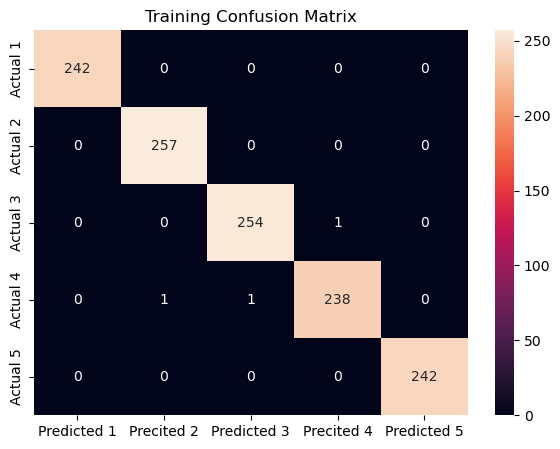

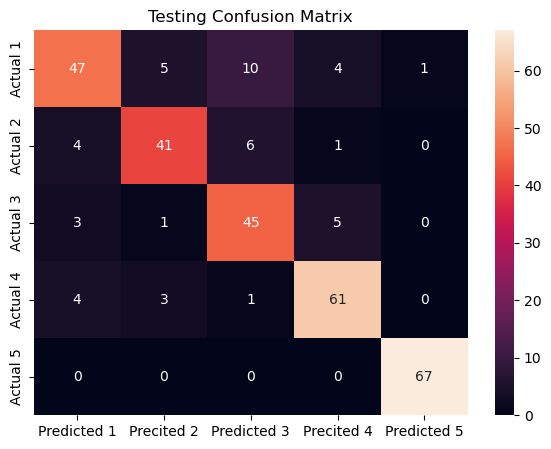

In [14]:
# SVM Initial Model (TFIDF) related confusion matrix

plt.figure(figsize = (7,5))
plt.title('Training Confusion Matrix')
display_html(sns.heatmap(conf_matrix[6][0], annot=True, fmt='.0f'))
print ("\n")

plt.figure(figsize = (7,5))
plt.title('Testing Confusion Matrix')
display_html(sns.heatmap(conf_matrix[6][1], annot=True, fmt='.0f'))
print ("\n")